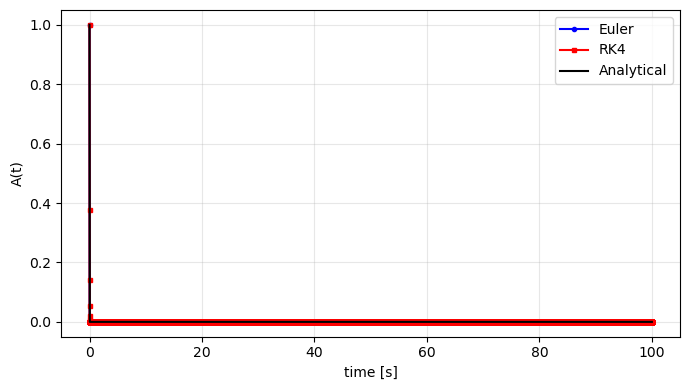

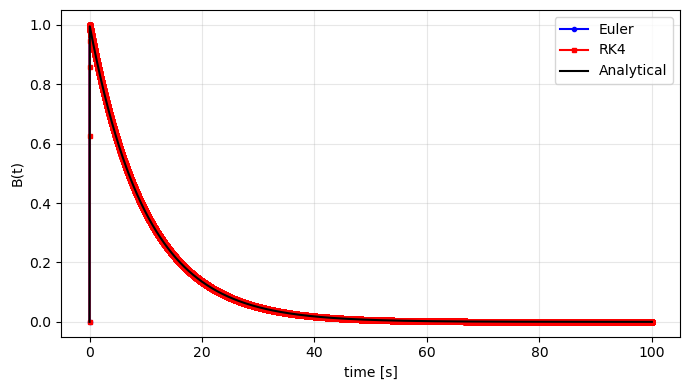

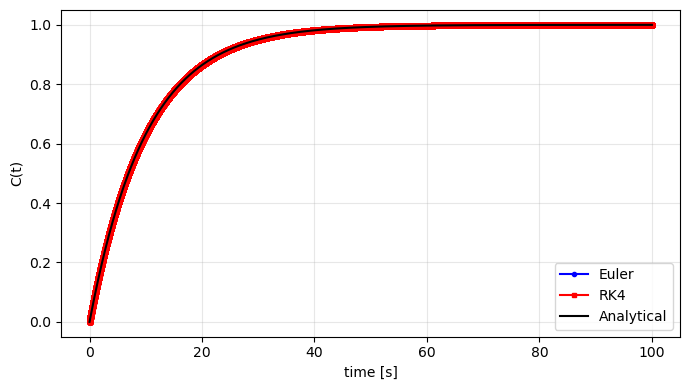

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# -------- Problem (stiff chain): A -> B -> C, k1 >> k2 --------
k1, k2 = 1000.0, 0.1      # s^-1
A0 = 1.0
y0 = np.array([A0, 0.0, 0.0])
t0, t_end = 0.0, 100.0

# -------- RHS and exact solutions --------
def f_vec(y):
    A, B, C = y
    return np.array([-k1*A, k1*A - k2*B, k2*B])

def A_exact(t): return A0*np.exp(-k1*t)
def B_exact(t): return A0*(k1/(k2 - k1))*(np.exp(-k1*t) - np.exp(-k2*t))
def C_exact(t): return A0 - A_exact(t) - B_exact(t)

# -------- Integrators (fixed step) --------
def euler(y0, h, t0, t1):
    N = int(np.floor((t1 - t0)/h))
    t = t0 + h*np.arange(N + 1)
    y = np.zeros((3, N + 1))
    y[:, 0] = y0
    for n in range(N):
        y[:, n+1] = y[:, n] + h * f_vec(y[:, n])
    return t, y

def rk4(y0, h, t0, t1):
    N = int(np.floor((t1 - t0)/h))
    t = t0 + h*np.arange(N + 1)
    y = np.zeros((3, N + 1))
    y[:, 0] = y0
    for n in range(N):
        k1v = f_vec(y[:, n])
        k2v = f_vec(y[:, n] + 0.5*h*k1v)
        k3v = f_vec(y[:, n] + 0.5*h*k2v)
        k4v = f_vec(y[:, n] + h*k3v)
        y[:, n+1] = y[:, n] + (h/6.0)*(k1v + 2*k2v + 2*k3v + k4v)
    return t, y

# -------- Step size (flexible!) --------
h = 0.001    # try changing this (must be < 2/k1 ≈ 0.002 for Euler to remain stable)

# Run Euler & RK4
te, ye = euler(y0, h, t0, t_end)
tr, yr = rk4(y0, h, t0, t_end)

# -------- Analytical curve --------
t_eval = np.linspace(t0, t_end, 2000)
Aex, Bex, Cex = A_exact(t_eval), B_exact(t_eval), C_exact(t_eval)

# -------- Plot: A(t) --------
plt.figure(figsize=(7,4))

plt.plot(te, ye[0], 'bo-', markersize=3, label='Euler')
plt.plot(tr, yr[0], 'rs-', markersize=3, label='RK4')
plt.plot(t_eval, Aex, 'k-', label='Analytical')
plt.xlabel("time [s]"); plt.ylabel("A(t)")
plt.legend(); plt.grid(True, alpha=0.3)
plt.tight_layout()

# -------- Plot: B(t) --------
plt.figure(figsize=(7,4))

plt.plot(te, ye[1], 'bo-', markersize=3, label='Euler')
plt.plot(tr, yr[1], 'rs-', markersize=3, label='RK4')
plt.plot(t_eval, Bex, 'k-', label='Analytical')
plt.xlabel("time [s]"); plt.ylabel("B(t)")
plt.legend(); plt.grid(True, alpha=0.3)
plt.tight_layout()

# -------- Plot: C(t) --------
plt.figure(figsize=(7,4))

plt.plot(te, ye[2], 'bo-', markersize=3, label='Euler')
plt.plot(tr, yr[2], 'rs-', markersize=3, label='RK4')
plt.plot(t_eval, Cex, 'k-', label='Analytical')
plt.xlabel("time [s]"); plt.ylabel("C(t)")
plt.legend(); plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()


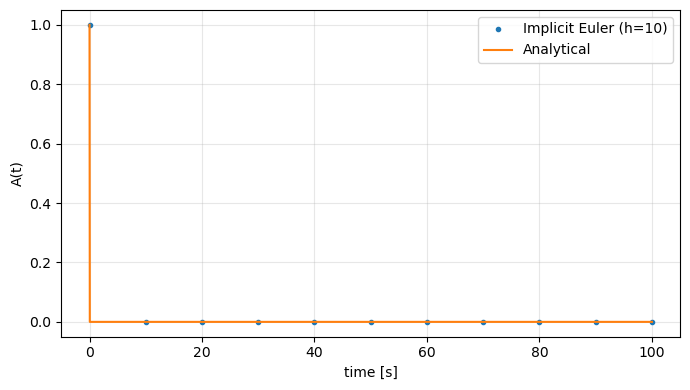

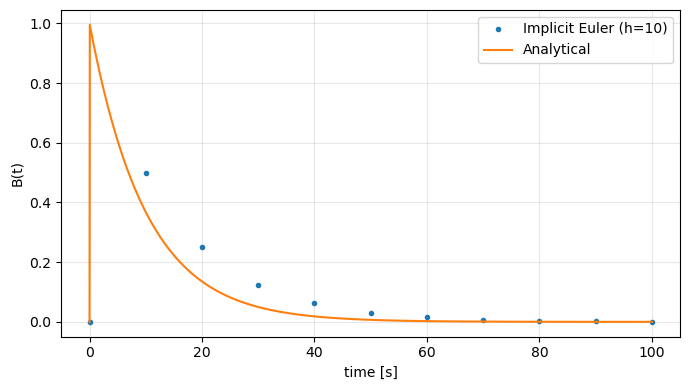

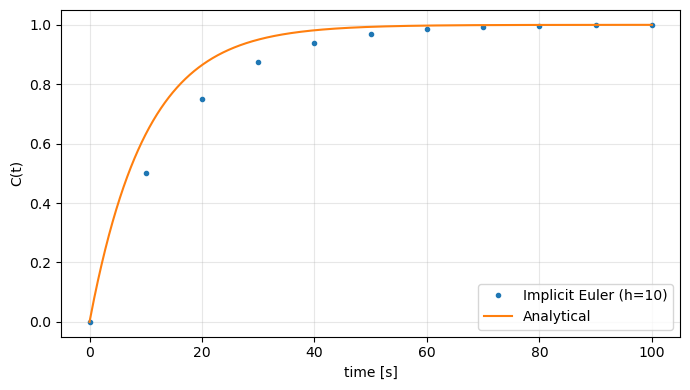

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# -------- Problem (stiff chain): A -> B -> C, k1 >> k2 --------
k1, k2 = 1000.0, 0.1     # s^-1  (edit as needed)
A0 = 1.0
y0 = np.array([A0, 0.0, 0.0])
t0, t_end = 0.0, 100.0   # cover both fast (~1/k1) and slow (~1/k2)

# System matrix y' = M y  for [A, B, C]^T
M = np.array([[-k1,   0.0, 0.0],
              [ k1,  -k2,  0.0],
              [ 0.0,  k2,  0.0]])

# -------- Analytical solution --------
def A_exact(t): return A0*np.exp(-k1*t)
def B_exact(t): return A0*(k1/(k2 - k1))*(np.exp(-k1*t) - np.exp(-k2*t))
def C_exact(t): return A0 - A_exact(t) - B_exact(t)

# -------- Implicit Euler (Backward Euler) with fixed step h --------
def implicit_euler(y0, h, t0, t1):
    N = int(np.floor((t1 - t0)/h))
    t = t0 + h*np.arange(N + 1)
    y = np.zeros((3, N + 1))
    y[:, 0] = y0
    # Pre-factorize (I - h M) since it's constant here
    A_mat = np.eye(3) - h * M
    A_LU = np.linalg.inv(A_mat)  # small 3x3; for bigger systems use a real solver/factorization
    for n in range(N):
        # (I - h M) y_{n+1} = y_n  ->  y_{n+1} = A_LU @ y_n
        y[:, n+1] = A_LU @ y[:, n]
    return t, y

# -------- Step size (flexible!) --------
h = 10   # <- change me. (Implicit Euler is A-stable, so any h is stable; accuracy improves as h ↓)

# Run implicit method
ti, yi = implicit_euler(y0, h, t0, t_end)

# Analytical for smooth reference
t_exact = np.linspace(t0, t_end, 2000)
Aex, Bex, Cex = A_exact(t_exact), B_exact(t_exact), C_exact(t_exact)

# -------- Plot: A(t) --------
plt.figure(figsize=(7,4))

plt.plot(ti, yi[0], 'o', markersize=3, label=f'Implicit Euler (h={h:g})')
plt.plot(t_exact, Aex, '-', label='Analytical')
plt.xlabel("time [s]"); plt.ylabel("A(t)")
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout()

# -------- Plot: B(t) --------
plt.figure(figsize=(7,4))

plt.plot(ti, yi[1], 'o', markersize=3, label=f'Implicit Euler (h={h:g})')
plt.plot(t_exact, Bex, '-', label='Analytical')
plt.xlabel("time [s]"); plt.ylabel("B(t)")
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout()

# -------- Plot: C(t) --------
plt.figure(figsize=(7,4))

plt.plot(ti, yi[2], 'o', markersize=3, label=f'Implicit Euler (h={h:g})')
plt.plot(t_exact, Cex, '-', label='Analytical')
plt.xlabel("time [s]"); plt.ylabel("C(t)")
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout()

plt.show()


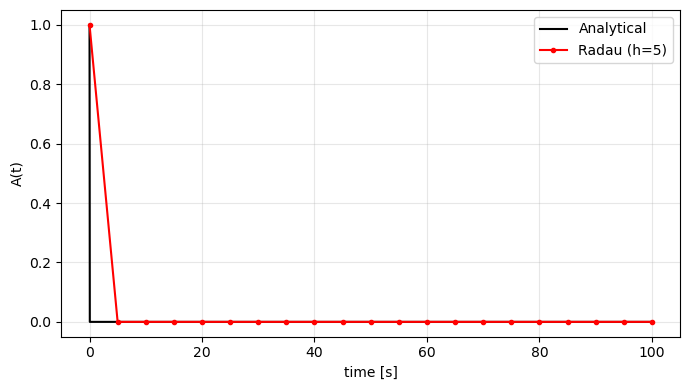

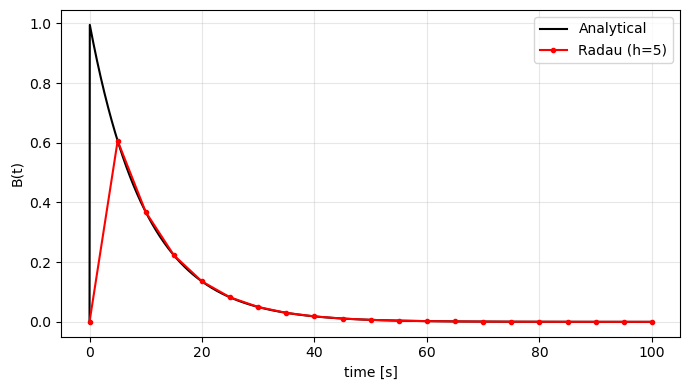

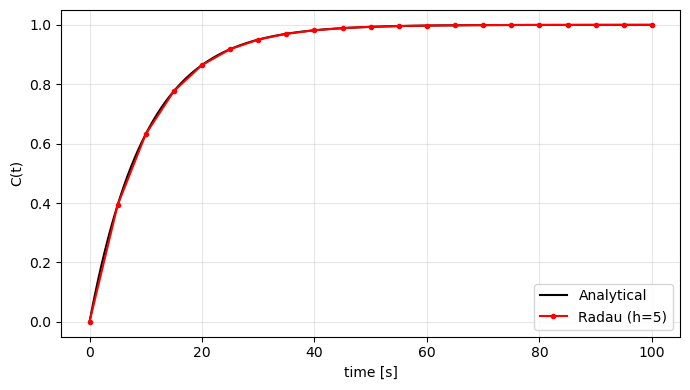

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -------- Problem (stiff chain): A -> B -> C --------
k1, k2 = 1000.0, 0.1
A0 = 1.0
y0 = [A0, 0.0, 0.0]
t0, t_end = 0.0, 100.0

def rhs(t, y):
    A, B, C = y
    return [-k1*A, k1*A - k2*B, k2*B]

# -------- Analytical solution --------
def A_exact(t): return A0*np.exp(-k1*t)
def B_exact(t): return A0*(k1/(k2 - k1))*(np.exp(-k1*t) - np.exp(-k2*t))
def C_exact(t): return A0 - A_exact(t) - B_exact(t)

# -------- Step size (flexible!) --------
h = 5   # <-- set your desired step size here

# Build exact multiples of h
T = t_end - t0
N = int(np.floor(T / h + 1e-12))     # number of full steps
t_eval = t0 + h * np.arange(N + 1)   # exact multiples of h
# Optionally include endpoint if not a multiple
if t_eval[-1] < t_end - 1e-12:
    t_eval = np.append(t_eval, t_end)

# -------- Solve with implicit RK (Radau) --------
sol = solve_ivp(rhs, (t0, t_end), y0, method="Radau",
                rtol=1e-9, atol=1e-12, t_eval=t_eval)

# -------- Analytical solution for reference --------
t_exact = np.linspace(t0, t_end, 2000)
Aex, Bex, Cex = A_exact(t_exact), B_exact(t_exact), C_exact(t_exact)

# -------- Plotting --------
def plot_comp(te, ye, t_exact, exact, idx, label):
    plt.figure(figsize=(7,4))
    
    plt.plot(te, ye[idx], 'ro-', markersize=3, label=f'Radau (h={h:g})')
    plt.plot(t_exact, exact, 'k-', label='Analytical')
    plt.xlabel("time [s]"); plt.ylabel(label)
    plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout()

plot_comp(sol.t, sol.y, t_exact, Aex, 0, "A(t)")
plot_comp(sol.t, sol.y, t_exact, Bex, 1, "B(t)")
plot_comp(sol.t, sol.y, t_exact, Cex, 2, "C(t)")

plt.show()
